In [33]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
matplotlib.rcParams['font.size'] = 12
plt.rcParams.update({'figure.figsize':[18,6]})
from matplotlib import cm
import sys
import pyhsmm
from pyhsmm.util.general import rle
import pyhsmm.basic.distributions as distributions

In [34]:
dur_distns = []

trans_matrix = np.array([[0.99, 0.01, 0.0, 0.0, 0.0],
                         [0.02,  0.9,  0.08, 0.0, 0.0],
                         [0.02, 0.0,  0.85, 0.13, 0.0],
                         [0.0,  0.0,  0.0, 0.9, 0.1],
                         [0.08,  0.0,  0.0, 0.02, 0.9]])

Nmax = 5
#     L = 5
#     obs_hypparams = {'alpha_0':np.zeros(L)+0.1,
#                     'K':L,
#                      'alphav_0':np.zeros(L)+0.1, 
#                      'alpha_mf':np.zeros(L)+0.1,
#                     }
obs_distns = []
#{1}
obs_hypparams = {'mu':np.array([[2.5]]),
                'sigma':np.array([[1**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{2}
obs_hypparams = {'mu':np.array([[8]]),
                'sigma':np.array([[1.1**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{3}
obs_hypparams = {'mu':np.array([[5]]),
                'sigma':np.array([[0.6**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{4}
obs_hypparams = {'mu':np.array([[4]]),
                'sigma':np.array([[0.5**2]]),
                'kappa_0':0.3,
                'nu_0':2}
obs_distns +=[distributions.Gaussian(**obs_hypparams)]
#{5}
obs_hypparams = {'mu':np.array([[1]]),
                'sigma':np.array([[0.5**2]]),
                'kappa_0':0.3,
                'nu_0':2}

obs_distns +=[distributions.Gaussian(**obs_hypparams)]

dur_hypparams = {'lmbda': 20,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda': 45,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda': 50,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda':50,
                 'alpha_0':1,
                 'beta_0':1}
dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

dur_hypparams = {'lmbda':35,
                 'alpha_0':1,
                 'beta_0':1}

dur_distns +=[distributions.PoissonDuration(**dur_hypparams)]

#     posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
#             alpha=6.,gamma=2., # better to sample over these; see concentration-resampling.py
#             init_state_concentration=6., # pretty inconsequential
#             obs_distns=obs_distns,
#             dur_distns=dur_distns)

model = pyhsmm.models.HSMM(
        alpha=0., # На что влияет 
#             gamma=2., # better to sample over these; see concentration-resampling.py
#         init_state_concentration=., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns,trans_matrix = trans_matrix,
        pi_0 = np.array([0.99, 0.01, 0.0, 0.0, 0.0]))
# model.resample_model()
# model.init_state_distn.pi_0 = [0.99, 0.01, 0.0 ]
# print(model.init_state_distn.pi_0)
# posteriormodel.add_data(data) # duration truncation speeds things up when it's possible

Конструктор


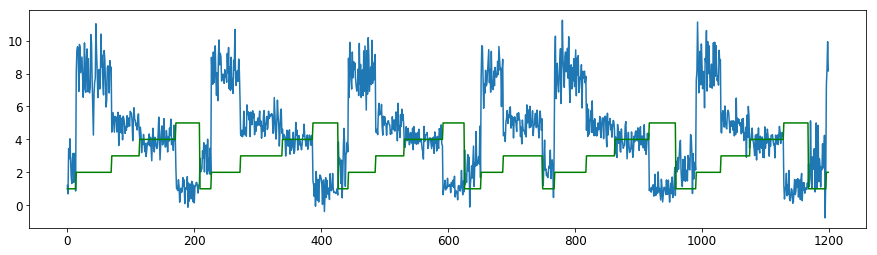

In [35]:
fig = plt.figure(figsize=(15,4))
signal, stateseq = model.generate(1200)
plt.plot(signal)
plt.plot(stateseq+1,'g')


In [36]:
def plot_stateseq(x_, stateseq, draw_stateseq = True):
    plt.figure(figsize=(16,3.5),dpi = 100)
    colors = ['#F1C40F','#2ECC71','#837051','#C0392B','#A569BD','#3498DB','#00FC6B','#C0392B','#837051']
    plt.plot(x_,'black')
    ymin = np.min(x_) - 0.5
    ymax = np.max(x_) + 0.5
    plt.ylim(ymin, ymax)
    plt.xlim(0,len(stateseq))
    if draw_stateseq == True:
        plt.plot(stateseq+1,'r')
    states, pos = rle(stateseq)
    positions = np.cumsum(pos)
    one = 0
    for state,start,end in zip(states[1:], positions, positions[1:]):
        if one == 0:
            plt.fill_between(x = np.arange(0,positions[0]+1),y1 = ymin, y2 = ymax,color=colors[states[0]], alpha = 0.8)
            one == 1
        plt.fill_between(x = np.arange(start,end+1),y1 = ymin, y2 = ymax,color=colors[state], alpha = 0.8)
    plt.xticks(np.arange(0,len(signal)+1,50))
    return

In [37]:
for s in model.used_states:
    print(s,' ',model.obs_distns[s].params, model.dur_distns[s].params)

0   {'mu': array([[2.5]]), 'sigma': array([[1]])} {'lmbda': 20}
1   {'mu': array([[8]]), 'sigma': array([[1.21]])} {'lmbda': 45}
2   {'mu': array([[5]]), 'sigma': array([[0.36]])} {'lmbda': 50}
3   {'mu': array([[4]]), 'sigma': array([[0.25]])} {'lmbda': 50}
4   {'mu': array([[1]]), 'sigma': array([[0.25]])} {'lmbda': 35}


In [38]:
def create_anomal(signal, stateseq, state, distribution, output = False):
    states, pos = rle(stateseq)
    positions = np.cumsum(pos)
    index = np.where(states == state)[0][1]
    if index == None:
        print('Пустой')
    a = positions[index - 1]
    b = positions[index]
    if output:
        print(a,b)
    anomal_signal = signal.copy()
    anomal_signal[a:b] = distribution.rvs(b-a).reshape(-1)    
    return anomal_signal

In [39]:
anomal_signal = create_anomal(signal, stateseq, 2 , model.obs_distns[4])

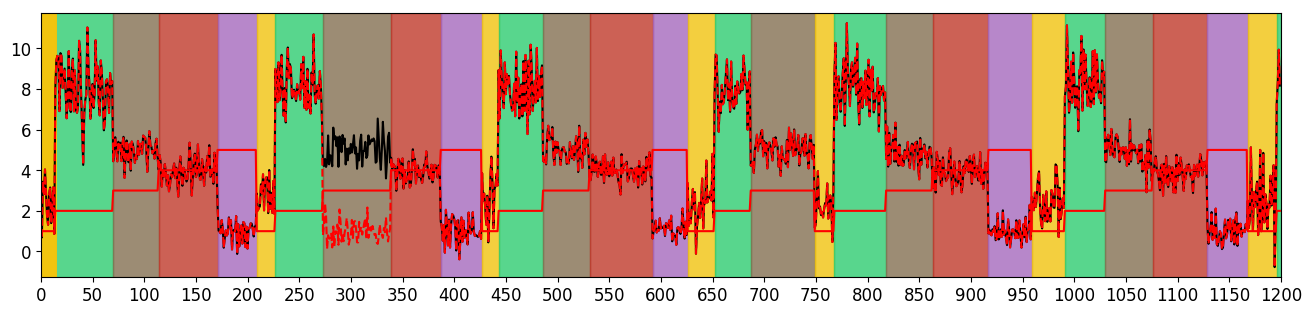

In [40]:
plot_stateseq(signal, stateseq)
plt.plot(anomal_signal,'r--')

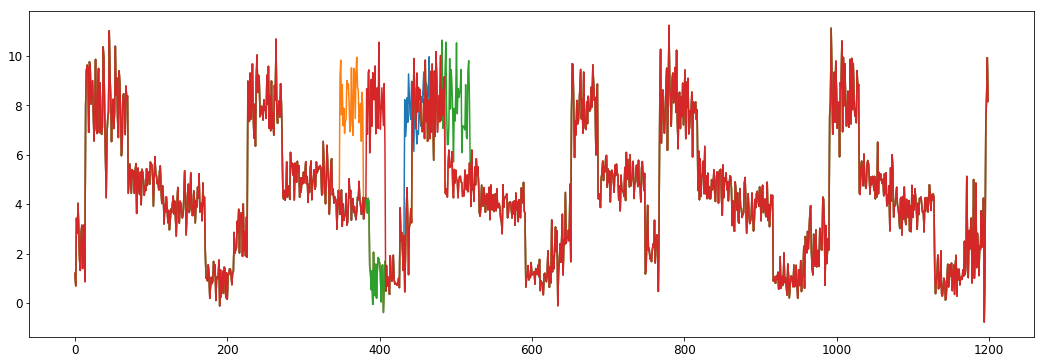

In [41]:
for i in range(200):
    t,stateseq = model.generate(1000)
#     print(stateseq)
    anomal_signal = create_anomal(signal, stateseq, 4 , model.obs_distns[1])
    if i % 50==0:
        plt.plot(anomal_signal)

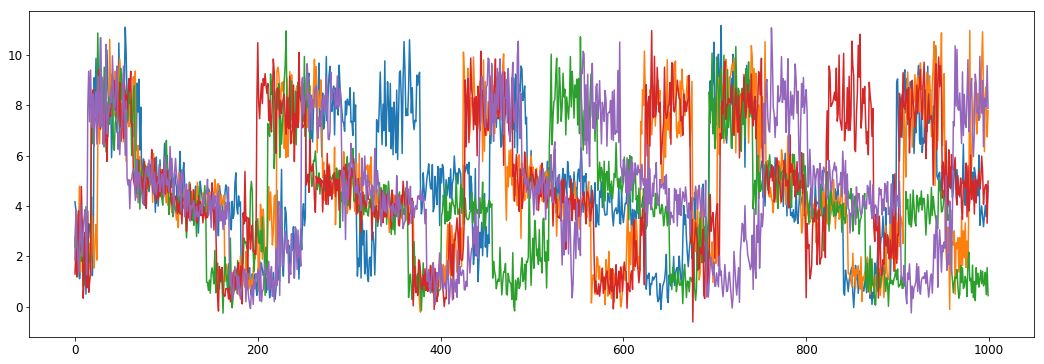

In [42]:
for i in range(5):
    signal,stateseq = model.generate(1000)
    plt.plot(signal)

In [65]:
ll = []
ll_anomal = [] 
anomal_signals = []; n_signals = []
for i in range(200):
    signal,stateseq = model.generate(800)
    n_signals += [signal]
    anomal_signal = create_anomal(signal, stateseq, 1 , model.obs_distns[4])
    anomal_signal = create_anomal(anomal_signal, stateseq, 2 , model.obs_distns[0])
    anomal_signals +=[anomal_signal]
    ll +=[model.log_likelihood(signal.reshape(-1,1))]
    ll_anomal +=[ model.log_likelihood(anomal_signal.reshape(-1,1))]

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


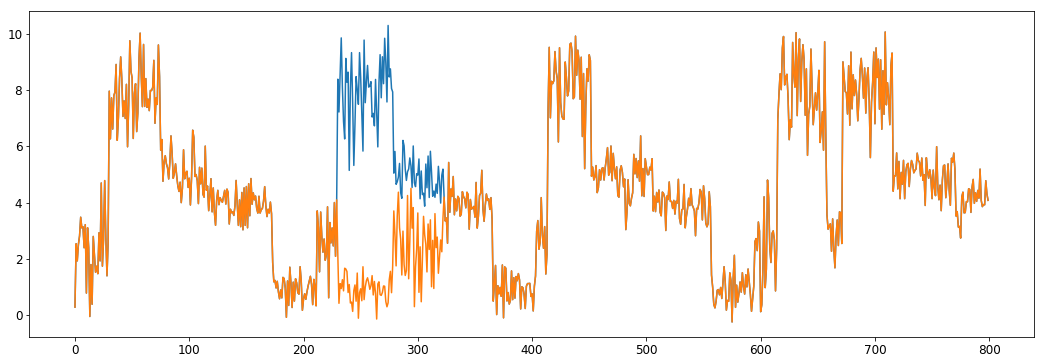

In [66]:
plt.plot(signal)
plt.plot(anomal_signal)

In [67]:
anomal_signal = create_anomal(signal, stateseq, 1 , model.obs_distns[4], True)

230 279


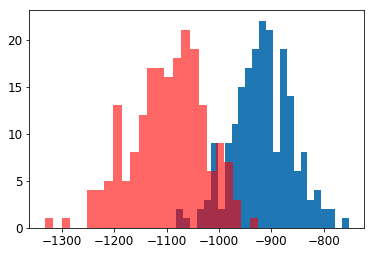

In [68]:
fig = plt.figure(figsize=(6,4))
plt.hist(ll,25);
plt.hist(ll_anomal,25,color='red', alpha = 0.6);

In [69]:
for i in range(20):
    print(model.log_likelihood(np.random.normal(loc = i, size=1500).reshape(-1,1)))
print('Normal ',model.log_likelihood(signal.reshape(-1,1)))

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


-7790.264016451828
-4703.195382886513
-4181.31628424032
-4112.29810560927
-3970.8125681678566
-3656.1329243173427
-4445.72234192218
-3313.6466807555116
-2825.9169536030167
-3562.0711519033207
-5635.525102487305
-8531.28304210469
-13001.470623506797
-18926.87747085157
-25684.97175536784
-33762.776927073246
-42900.90054658973
-54281.454702385505
-65528.67142135969
-78263.23539601322
Normal  -908.0091281153761


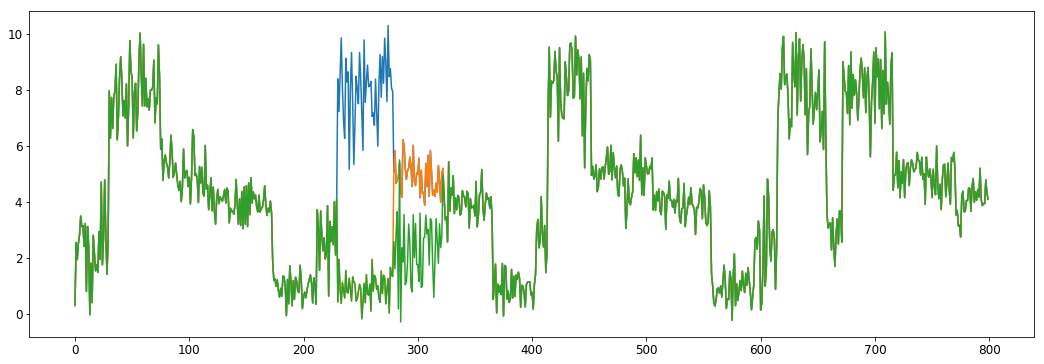

In [70]:
plt.plot(signal)
plt.plot(anomal_signal)
p = create_anomal(anomal_signal,stateseq, 2 , model.obs_distns[0])
plt.plot(p)

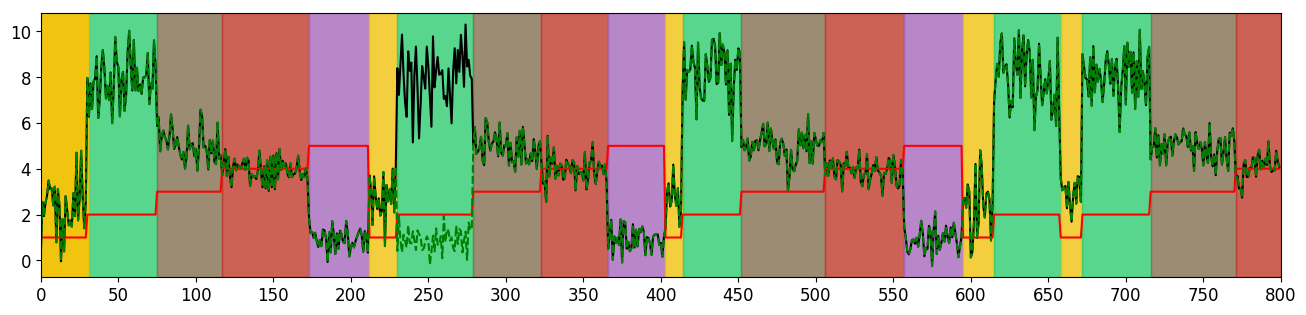

In [71]:
plot_stateseq(signal, stateseq)
plt.plot(anomal_signal,'g--')

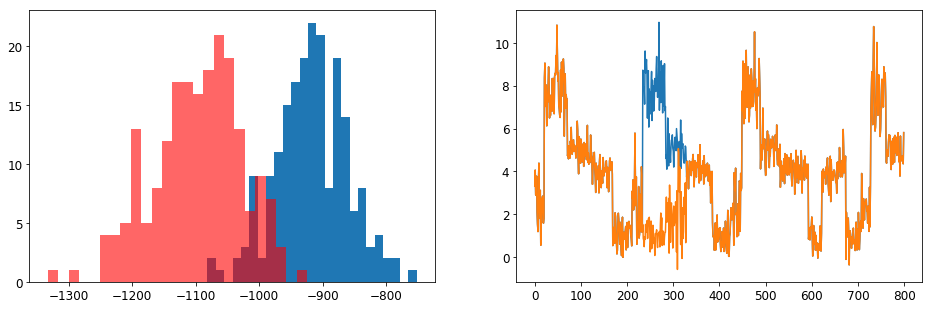

In [86]:
# fig = plt.figure(figsize=(5,2))
fig, ax = plt.subplots(1,2,figsize = (16,5))
ax[0].hist(ll,25);
ax[0].hist(ll_anomal,25,color='red', alpha = 0.6);
ax[1].plot(n_signals[10])
ax[1].plot(anomal_signals[10])

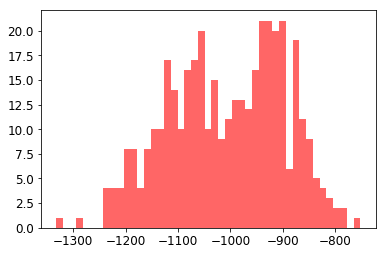

In [73]:
fig = plt.figure(figsize=(6,4))

plt.hist(np.concatenate((ll, ll_anomal)),45,color='red', alpha = 0.6);

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


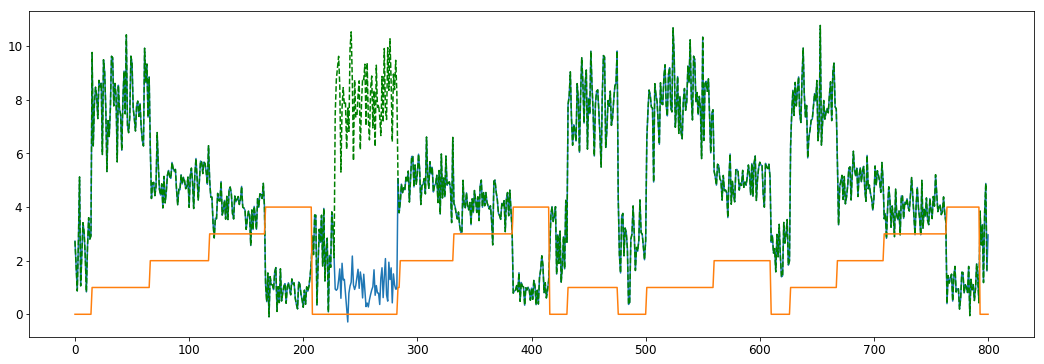

In [52]:
pred, y_pred = model.predict(anomal_signal.reshape(-1,1),1)
plt.plot(pred)
plt.plot(signal,'g--')
plt.plot(y_pred)

/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:347: RuntimeWarning: divide by zero encountered in log
  self.trans_potentials, np.log(self.pi_0),
/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:92: RuntimeWarning: divide by zero encountered in log
  self._log_trans_matrix = np.log(self.trans_matrix)
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


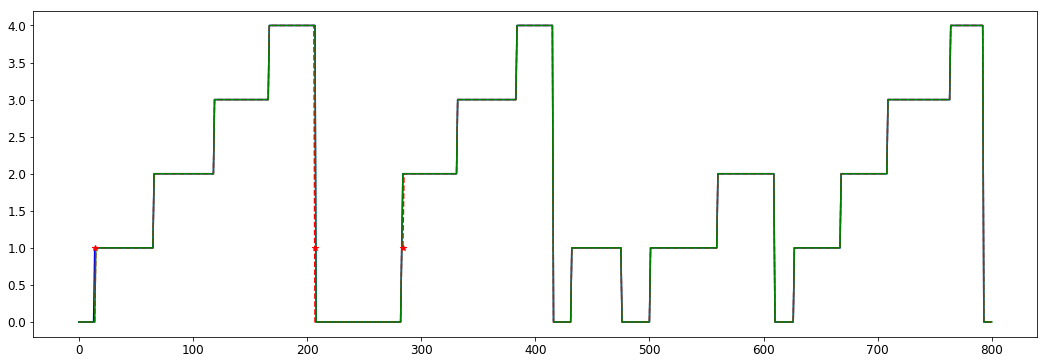

In [53]:
path_vit = model.heldout_viterbi(anomal_signal.reshape(-1,1))
path_pred = model.predict(anomal_signal.reshape(-1,1),1)[1]
pred = model.predict(anomal_signal.reshape(-1,1),1)[1]
plt.plot(path_vit,'blue')
plt.plot(path_pred,'r--')
plt.plot(pred,'green')
plt.plot(np.where(path_vit!= path_pred[:-1],1,None),'r*')

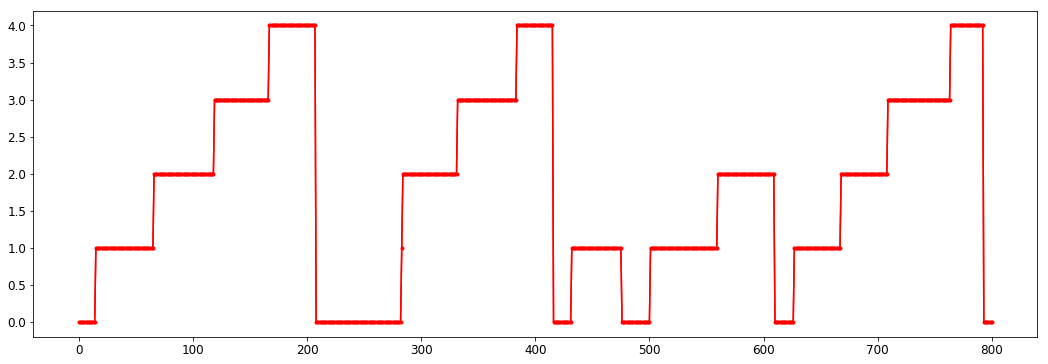

In [54]:
plt.plot(pred,'r',linewidth = 1.5)
plt.plot(pred,'r',linewidth = 1.5,marker = '.')

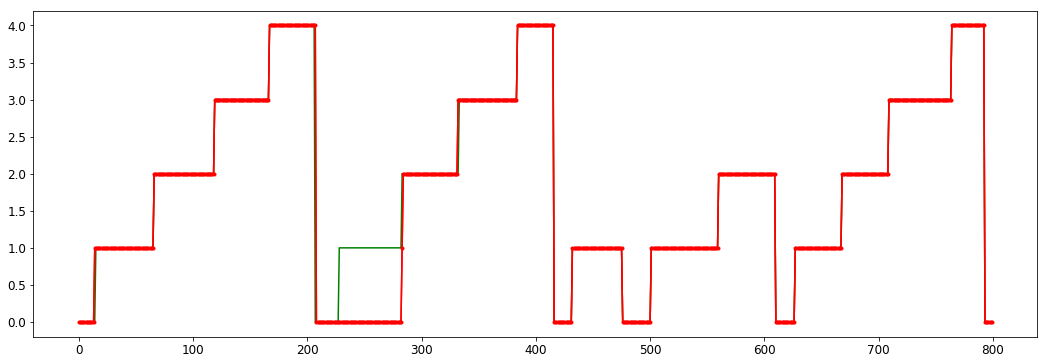

In [55]:
plt.plot(stateseq,linewidth = 1.5, color = 'green')
# plt.plot(path_pred,'r',linewidth = 1.5)
plt.plot(path_vit,'r',linewidth = 1.5)
plt.plot(path_vit,'r',linewidth = 1.5,marker = '.')

In [56]:
a = [1,3,5]
a[-1]

5

In [57]:
a

[1, 3, 5]

In [58]:
a.pop()
a

[1, 3]

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))
/home/kirilman/anaconda3/lib/python3.6/site-packages/pyhsmm-0.1.6-py3.6-linux-x86_64.egg/pyhsmm/internals/hsmm_states.py:512: RuntimeWarning: divide by zero encountered in log
  self._normalizer = logsumexp(np.log(self.pi_0) + betastarl[0])


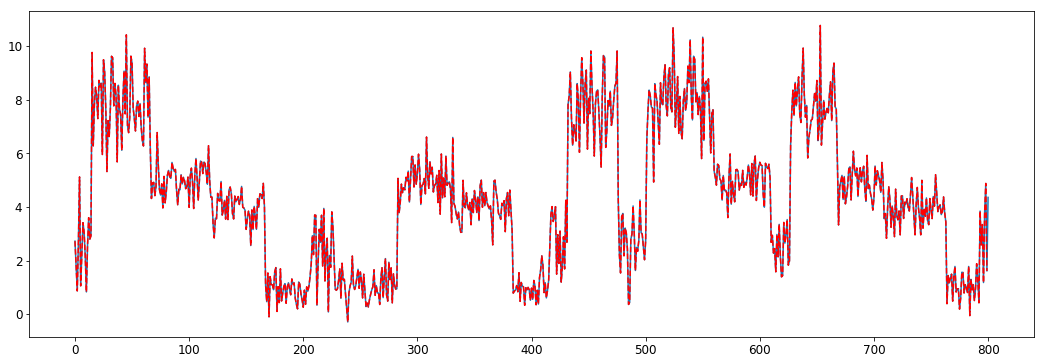

In [59]:
t_, s_ = model.predict(anomal_signal.reshape(-1,1),1)
plt.plot(t_)
plt.plot(anomal_signal,'r--')

In [60]:
len(s_)

801

In [61]:
import pomegranate as pg

In [62]:
chain = pg.MarkovChain.from_samples([stateseq])
chain.log_probability(y_pred)

-98.62406795113075

In [63]:
chain.log_probability([0,1,1,4])

-inf

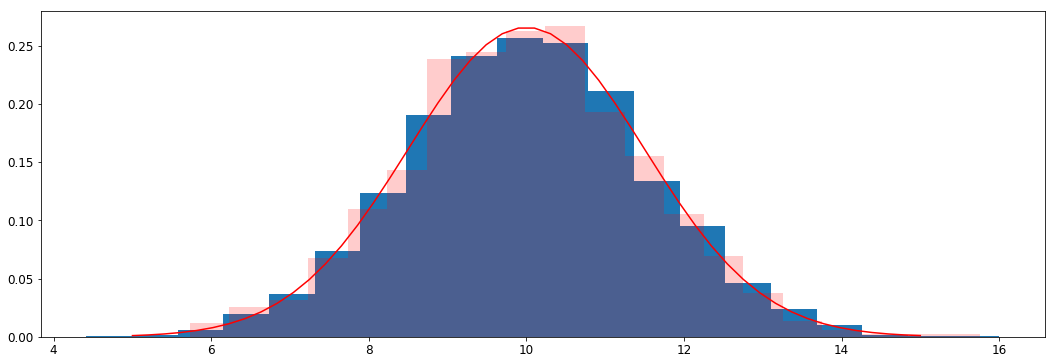

In [64]:
from scipy.stats import norm
mu = 10; sigma = 1.5
dist = distributions.Gaussian(mu = np.array([[mu]]), sigma = np.array([[sigma**2]]),)
sample = dist.rvs(10000)
plt.hist(sample,20, density = True);
density = norm(loc= mu,scale = sigma)
x = np.linspace(5,15)
plt.plot(x, density.pdf(x),'red')
plt.hist(density.rvs(1000),20,color = 'red', alpha = 0.2, density=True);